<a href="https://colab.research.google.com/github/InspectorData/DataScienceApps_practice/blob/master/EDA-SandP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [5]:
! pip install yfinance

     |████████████████████████████████| 6.4 MB 10.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [67]:

# Web scraping of S&P 500 data

def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df



In [68]:

df = load_data()
df


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


Webscraping of NASDAQ 100

In [19]:
# Web scraping of NASDAQ 100 data

def load_data():
    url = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
    html = pd.read_html(url, header = 0)
    df3 = html[2]
    return df3

In [69]:
df2 = load_data()
df2

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


Examing Data Webscraped Data

In [26]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [27]:
len(sector_unique)

11

# **Group by Sector**

In [29]:
sector = df.groupby('GICS Sector')

In [32]:
sector.first()


,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [33]:
sector.describe()


CIK                ...                       
                       count          mean  ...         75%        max
GICS Sector                                 ...                       
Communication Services  27.0  1.107343e+06  ...  1500907.50  1754301.0
Consumer Discretionary  63.0  8.477582e+05  ...  1164229.50  1590895.0
Consumer Staples        32.0  3.872794e+05  ...   789573.00  1679273.0
Energy                  21.0  7.674384e+05  ...  1163165.00  1701605.0
Financials              65.0  6.325087e+05  ...  1120193.00  1601712.0
Health Care             64.0  8.164259e+05  ...  1097811.75  1821825.0
Industrials             73.0  6.945875e+05  ...  1090727.00  1783180.0
Information Technology  75.0  9.178549e+05  ...  1346724.50  1730168.0
Materials               28.0  8.369064e+05  ...  1419355.00  1755672.0
Real Estate             29.0  8.957202e+05  ...  1053507.00  1393311.0
Utilities               28.0  8.035041e+05  ...  1036121.50  1711269.0

[11 rows x 8 columns]

In [34]:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALGN,Align Technology,reports,Health Care,Health Care Supplies,"San Jose, California",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


Finance Data

In [37]:
import yfinance as yf

List of S&P 500 symbols

In [39]:
list(df.Symbol)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

# **Retrieve stock data**

In [41]:
# https://pypi.org/project/yfinance/

data = yf.download(
        #or pdr.get_data_yahoo
        #tickerslist or string as well
        tickers = list(df.Symbol),
        
        #use "period" instead of start/end 
        #valid period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y,ytd, max
        #(optional, defaul is '1mo')
        period = "ytd",
        
        #fetch data by interval(including intraday if period <60 days)
        #valid intervals: 1m, 2m, 5m, 15,m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
        #(optional, default is '1d')
        interval = "1d",
        
        #group by ticker( to access via data['SPY])
        #(optional, default is 'column')
        group_by = 'ticker',
        
        #adjust all OHLC automatically
        #(optional, default is 'column')
        auto_adjust = True,
        

        #download pre.post regualr market hours data
        #(optional, default is False )
        prepost = True,
        
        #use thread for mass downloading? (True/False/Integer)
        #(optional, default is True)
        threads = True,

        #proxy URL scheme use use when downloading?
        #(optional, default is None)
        proxy = None 
    )

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [42]:
data

KEYS                          ...         ICE                     
                  Open        High         Low  ...         Low       Close   Volume
Date                                            ...                                 
2021-01-04  132.419998  132.750000  129.317001  ...  111.143316  112.063164  2726500
2021-01-05  131.500000  134.000000  131.199997  ...  111.716974  112.300537  2286200
2021-01-06  133.600006  137.376999  133.190002  ...  111.529060  114.476524  2581600
2021-01-07  137.149994  141.029999  136.610001  ...  113.635799  114.545753  2357800
2021-01-08  140.910004  147.020004  140.910004  ...  114.822697  116.345886  2405600
...                ...         ...         ...  ...         ...         ...      ...
2021-12-16  203.610001  204.899994  198.035004  ...  135.029999  135.990005  2603100
2021-12-17  197.479996  199.580002  196.520004  ...  133.199997  133.380005  4208000
2021-12-20  196.059998  197.251007  192.080002  ...  130.889999  132.559998  1516400
2021-12-21  195.600006  197.660004  194.470001  ...  132.559998  134.059998  1713500
2021-12-22  197.910004  200.824997  196.919998  ...  133.369995  135.240005  1083500

[246 rows x 2527 columns]

Subset Query

In [44]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200
...,...,...,...,...,...
2021-12-16,179.279999,181.139999,170.750000,172.259995,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,107499100


In [45]:
data['GOOG']

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1901900
2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1145300
2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,2602100
2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,2265000
2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600
...,...,...,...,...,...
2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,1370000
2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2162800
2021-12-20,2813.592041,2852.209961,2805.000000,2848.030029,1013200


In [74]:
df2 = pd.DataFrame(data['GOOGL'].Close)
df2['Date']= df2.index
df2

,Close,Date
Date,,
2021-01-04,1726.130005,2021-01-04
2021-01-05,1740.050049,2021-01-05
2021-01-06,1722.880005,2021-01-06
2021-01-07,1774.339966,2021-01-07
2021-01-08,1797.829956,2021-01-08
...,...,...
2021-12-16,2888.899902,2021-12-16
2021-12-17,2834.500000,2021-12-17
2021-12-20,2832.139893,2021-12-20


Text(0, 0.5, 'Closing Price')

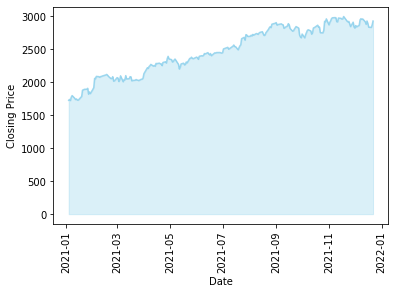

In [50]:
plt.fill_between(df.Date, df.Close, color="skyblue", alpha=0.3)
plt.plot(df.Date, df.Close, color = "skyblue", alpha= 0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [75]:
def price_plot(symbol):
  df2 = pd.DataFrame(data[symbol].Close)
  df2['Date'] =df2.index
  plt.fill_between(df2.Date, df2.Close, color='skyblue',alpha= 0.3)
  plt.plot(df2.Date, df2.Close, color='skyblue', alpha =0.8)
  plt.xticks(rotation =90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date',fontweight='bold')
  plt.ylabel('Closing Price', fontweight ='bold')
  return plt.show()

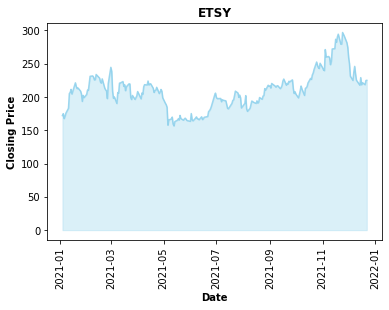

In [76]:
price_plot('ETSY')

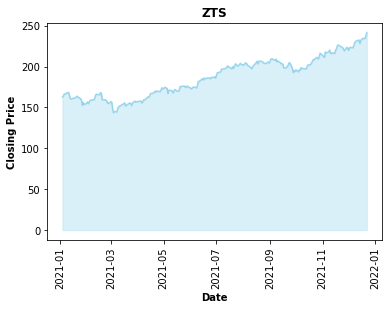

In [60]:
price_plot('ZTS')

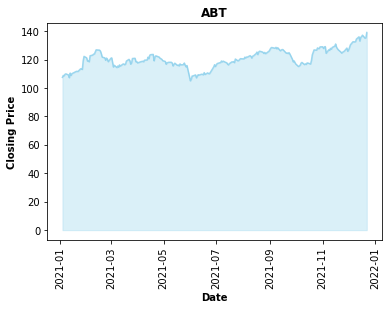

In [61]:
price_plot('ABT')

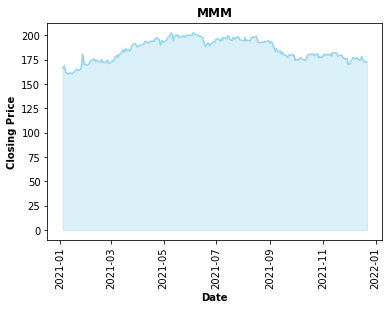

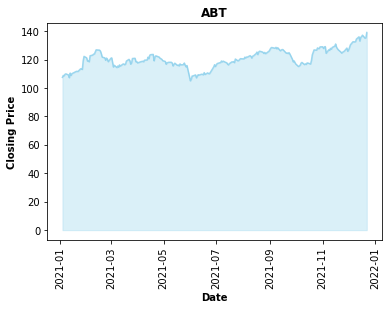

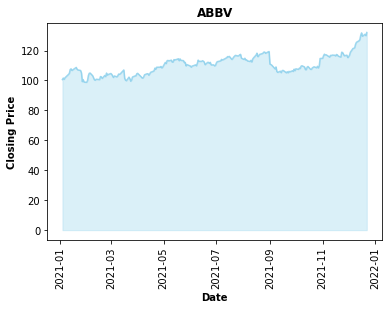

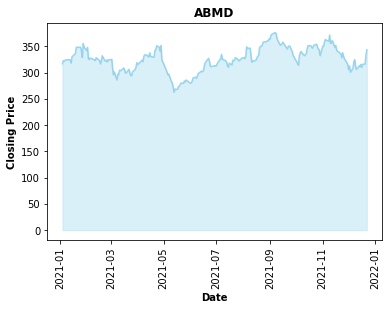

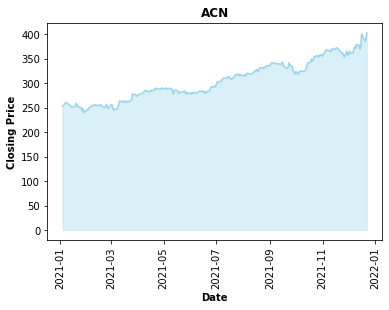

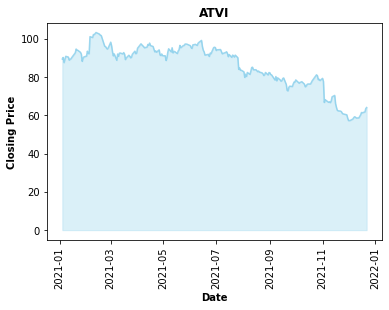

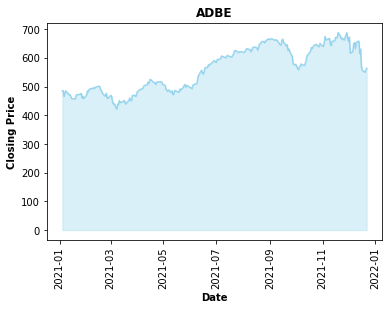

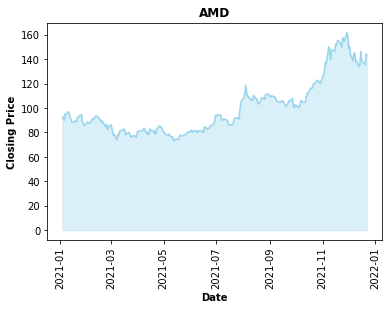

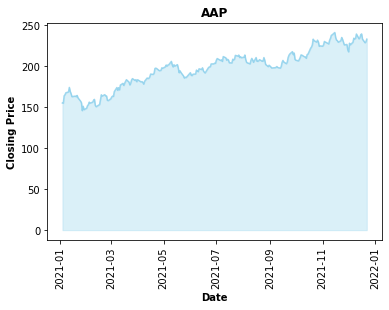

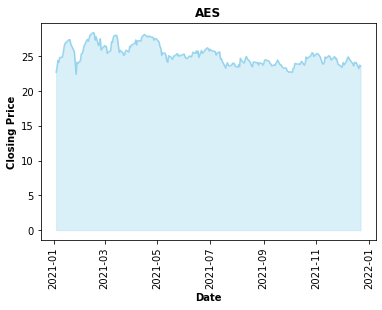

In [71]:
for i in list(df.Symbol)[:10]:
    price_plot(i)